In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/marketing_data.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  numpy as np
import warnings
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [3]:
df=pd.read_csv('../input/marketing-data/marketing_data.csv')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


* Id: Id card
* Year_Birth: the year of the birth
* Education: Eduation
* Maritial_status: Maritial_status
* income; salary of the year
* kidhome: Number of Children in costumers household
* teenhome: number of teenagers in costumers household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* MntWines: Amount spent on wine in the last 2 years
* MntFruits: Amount spent on meat in the last 2 years
* MntFishProducts: Amount spent on fish in the last 2 years
* MntSweetProducts: Amount spent on sweet in the last 2 years
* MntGoldProds: Amount spent on gold in the last 2 years
* NumDealsPurchases: Number of deal Purchase 
* NumWebPurchases: number of people who by with web
* NumCatalogPurchases: Number of catalog purchases
* NumStorePurchases: Number of store purchases
* NumWebVisitsMonth: Number of people who visit the web in this month
* AcceptedCmp3: AcceptedCmp3
* AcceptedCmp4: AcceptedCmp4
* AcceptedCmp5: AcceptedCmp5
* AcceptedCmp1: AcceptedCmp1
* AcceptedCmp2: AcceptedCmp2
* Response: Response 
* Complain: Complain
* Country: Country

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
df.shape

(2240, 28)

In [6]:
df.drop(columns=['ID','Year_Birth','Dt_Customer'],axis=1,inplace=True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,Graduation,Divorced,"$84,835.00",0,0,0,189,104,379,111,...,6,1,0,0,0,0,0,1,0,SP
1,Graduation,Single,"$57,091.00",0,0,0,464,5,64,7,...,7,5,0,0,0,0,1,1,0,CA
2,Graduation,Married,"$67,267.00",0,1,0,134,11,59,15,...,5,2,0,0,0,0,0,0,0,US
3,Graduation,Together,"$32,474.00",1,1,0,10,0,1,0,...,2,7,0,0,0,0,0,0,0,AUS
4,Graduation,Single,"$21,474.00",1,0,0,6,16,24,11,...,2,7,1,0,0,0,0,1,0,SP


In [7]:
df.describe()

,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
## sum of the numbers and divide to number by amount of the numbers
df.mean()

Kidhome                  0.444196
Teenhome                 0.506250
Recency                 49.109375
MntWines               303.935714
MntFruits               26.302232
MntMeatProducts        166.950000
MntFishProducts         37.525446
MntSweetProducts        27.062946
MntGoldProds            44.021875
NumDealsPurchases        2.325000
NumWebPurchases          4.084821
NumCatalogPurchases      2.662054
NumStorePurchases        5.790179
NumWebVisitsMonth        5.316518
AcceptedCmp3             0.072768
AcceptedCmp4             0.074554
AcceptedCmp5             0.072768
AcceptedCmp1             0.064286
AcceptedCmp2             0.013393
Response                 0.149107
Complain                 0.009375
dtype: float64

In [9]:
#Middle of the point
df.median()

Kidhome                  0.0
Teenhome                 0.0
Recency                 49.0
MntWines               173.5
MntFruits                8.0
MntMeatProducts         67.0
MntFishProducts         12.0
MntSweetProducts         8.0
MntGoldProds            24.0
NumDealsPurchases        2.0
NumWebPurchases          4.0
NumCatalogPurchases      2.0
NumStorePurchases        5.0
NumWebVisitsMonth        6.0
AcceptedCmp3             0.0
AcceptedCmp4             0.0
AcceptedCmp5             0.0
AcceptedCmp1             0.0
AcceptedCmp2             0.0
Response                 0.0
Complain                 0.0
dtype: float64

In [10]:
#we want to clean the some attributes in columns
df.columns = df.columns.str.replace(' ', '')

df['Income'] = df['Income'].str.replace('$', '')
df['Income']=df['Income'].str.replace(',','').astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [11]:
df.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,6,1,0,0,0,0,0,1,0,SP
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,7,5,0,0,0,0,1,1,0,CA
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,...,5,2,0,0,0,0,0,0,0,US
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,...,2,7,0,0,0,0,0,0,0,AUS
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,2,7,1,0,0,0,0,1,0,SP


In [12]:
#dived the target with 1 and o
target=df[df['Response']==1]
non_target=df[df['Response']==0]

In [13]:
#we use this part for analyzing the data based on response
target_cols=['Response']
cat_cols=df.nunique()[df.nunique()<6].keys().tolist()
cat_cols=[x for x in cat_cols if x not in target_cols]
num_col=[x for x in df.columns if x not in cat_cols+ target_cols]

In [14]:
#the highest part is for graducation and lowest is for basic
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [15]:
#Most of then people are married and the Yolo has the lowest portion
df['Marital_Status'].value_counts(normalize=True)*100

Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: Marital_Status, dtype: float64

In [16]:
#we use filter to understand the number of people who are get married and their salary is more than 80000$
df[(df['Marital_Status']=='Married')& (df['Income']>80000)]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
10,2n Cycle,Married,81044.0,0,0,0,450,26,535,73,...,10,1,0,0,0,0,0,0,0,US
53,Graduation,Married,90369.0,0,0,2,292,51,981,224,...,6,1,0,0,0,0,0,1,0,SP
58,Graduation,Married,83715.0,0,0,2,318,8,407,150,...,13,0,0,0,0,0,0,0,0,SA
67,2n Cycle,Married,82504.0,0,0,2,362,50,431,134,...,7,1,0,0,0,0,0,0,0,IND
98,Graduation,Married,80011.0,0,1,3,421,76,536,82,...,5,4,0,0,0,0,0,0,0,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,PhD,Married,84618.0,0,0,96,684,100,801,21,...,10,2,0,0,1,0,0,0,0,AUS
2167,PhD,Married,84618.0,0,0,96,684,100,801,21,...,10,2,0,0,1,0,0,0,0,SP
2192,Graduation,Married,93404.0,1,2,97,1279,15,287,20,...,7,5,0,1,1,0,0,0,0,CA
2204,PhD,Married,157243.0,0,1,98,20,2,1582,1,...,0,0,0,0,0,0,0,0,0,IND


In [17]:
df[(df['Complain']==1)&(df['Response']==1)]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
662,Graduation,Single,37774.0,2,0,28,173,8,107,7,...,3,9,1,0,0,0,0,1,1,SP
943,PhD,Single,39684.0,1,0,41,19,0,35,6,...,2,7,0,0,0,0,0,1,1,SP
1298,2n Cycle,Single,83257.0,0,0,56,536,27,590,38,...,12,6,1,0,1,0,0,1,1,SP


In [18]:
df['Education'].unique()
Education_MntWines=pd.crosstab(df['Education'],df['MntWines'])
Education_MntWines

MntWines,0,1,2,3,4,5,6,7,8,9,...,1379,1394,1396,1449,1459,1462,1478,1486,1492,1493
Education,,,,,,,,,,,,,,,,,,,,,
2n Cycle,4,6,9,3,6,8,4,3,7,3,...,0,0,0,0,0,0,0,0,0,0
Basic,6,16,10,3,5,2,4,3,1,1,...,0,0,0,0,0,0,0,0,0,0
Graduation,3,15,20,21,18,24,19,11,13,14,...,1,1,0,1,0,0,0,0,2,0
Master,0,0,2,3,1,3,6,3,7,6,...,0,0,0,0,0,0,0,1,0,0
PhD,0,0,1,0,3,3,4,2,2,4,...,0,0,1,0,1,1,2,0,0,1


In [19]:
df['Response'].unique()
Response_Marital_Status=pd.crosstab(df['Response'],df['Marital_Status'])
Response_Marital_Status

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Response,,,,,,,,
0,1,2,184,766,374,520,58,1
1,1,1,48,98,106,60,19,1


In [20]:
df['Total Spent'] = (df['MntFishProducts'] + df['MntWines'] + df['MntSweetProducts']
                       + df['MntFruits'] + df['MntMeatProducts'] + df['MntGoldProds'] )
df['Total Purchase']=(df['NumDealsPurchases']+df['NumWebPurchases']+df['NumStorePurchases']+df['NumCatalogPurchases'])

In [21]:
df.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total Spent,Total Purchase
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,0,0,0,0,0,1,0,SP,1190,15
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,0,0,0,0,1,1,0,CA,577,18
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,0,0,0,US,251,11
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,0,0,0,AUS,11,4
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,1,0,0,0,0,1,0,SP,91,8


In [22]:
#we want to use the groupby with sum and count with Countries
df_grouped_sum=df.groupby('Marital_Status',as_index=False)['Income'].agg('sum').rename(columns={'Income':'Income_Sum'})
df_grouped_cnt=df.groupby('Marital_Status',as_index=False)['Income'].agg('count').rename(columns={'Income':'Income_Count'})

# now we want ro the merge these 2 lines
df_grouped_Salary=df_grouped_sum.merge(df_grouped_cnt,left_on='Marital_Status',right_on='Marital_Status',how='inner')
#now we want to calculate the average salary
df_grouped_Salary.loc[:,'Average of Salary']=df_grouped_Salary['Income_Sum']/df_grouped_Salary['Income_Count']

df_grouped_Salary.sort_values('Income_Sum',ascending=False)

,Marital_Status,Income_Sum,Income_Count,Average of Salary
3,Married,44328307.0,857,51724.978996
5,Together,30509691.0,573,53245.534031
4,Single,24018810.0,471,50995.350318
2,Divorced,12257541.0,232,52834.228448
6,Widow,4292598.0,76,56481.552632
0,Absurd,144731.0,2,72365.500000
1,Alone,131367.0,3,43789.000000
7,YOLO,96864.0,2,48432.000000


In [23]:
df_grouped_sum=df.groupby('Country',as_index=False)['Income'].agg('sum').rename(columns={'Income':'Income_Sum'})
df_grouped_cnt=df.groupby('Country',as_index=False)['Income'].agg('count').rename(columns={'Income':'Income_Count'})
#niw we merge these 2 codes
df_grouped_Salary=df_grouped_sum.merge(df_grouped_cnt,left_on='Country',right_on='Country',how='inner')
#calculate the average 
df_grouped_Salary.loc[:,'Average of Salary']=df_grouped_Salary['Income_Sum']/df_grouped_Salary['Income_Count']
df_grouped_Salary.sort_values('Income_Sum',ascending=False)

,Country,Income_Sum,Income_Count,Average of Salary
6,SP,56360083.0,1093,51564.577310
5,SA,18477985.0,337,54830.816024
1,CA,14111464.0,266,53050.616541
0,AUS,7615230.0,147,51804.285714
3,IND,7205413.0,147,49016.414966
2,GER,6142327.0,116,52951.094828
7,US,5694366.0,107,53218.373832
4,ME,173041.0,3,57680.333333


# **Data Visualization**

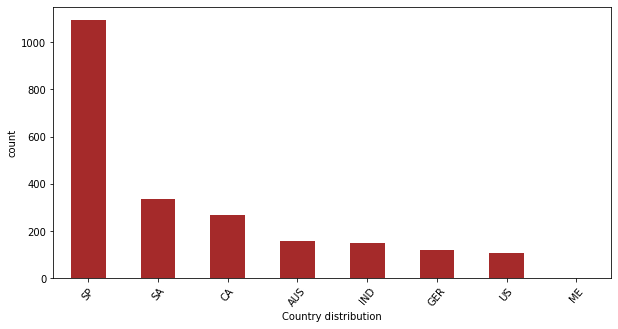

In [24]:
plt.rcParams['figure.figsize']=(10,5)
df['Country'].value_counts().sort_values(ascending=False).plot.bar(color='brown')
plt.xlabel('Country distribution')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.show()

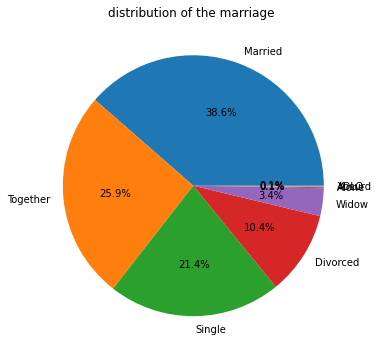

In [25]:
plt.rcParams['figure.figsize']=(26,6)
df['Marital_Status'].value_counts().sort_values(ascending=False).plot.pie(y='Marital_Status',autopct="%0.1f%%")
plt.title('distribution of the marriage ')
plt.axis('off')
plt.show() #married has the highest percent with almost 39

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


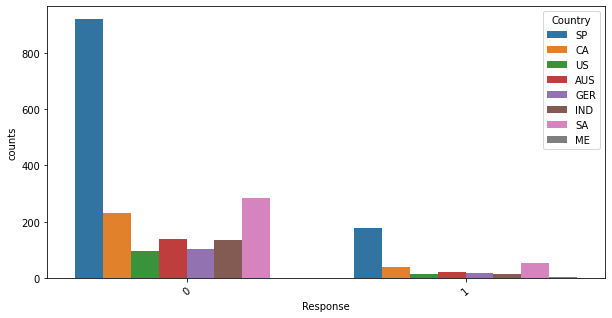

In [26]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(df['Response'],hue=df['Country'],ax=ax)
plt.xlabel('Response')
plt.ylabel('counts')
plt.xticks(rotation=40)
plt.show()

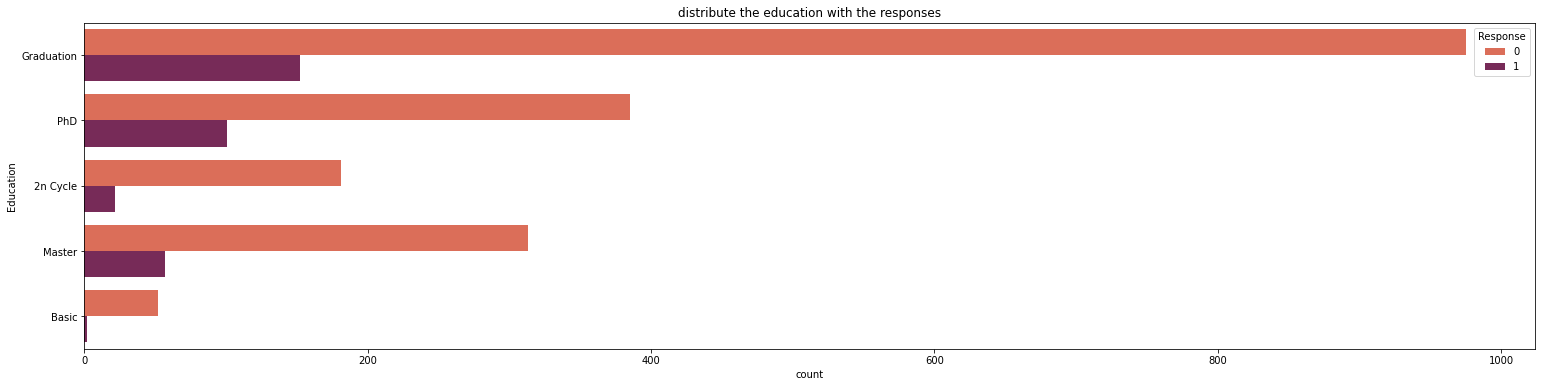

<Figure size 720x360 with 0 Axes>

In [27]:
sns.countplot(data=df,y='Education',hue='Response',palette='rocket_r')
plt.title('distribute the education with the responses')
plt.figure(figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='Response', ylabel='Total Purchase'>

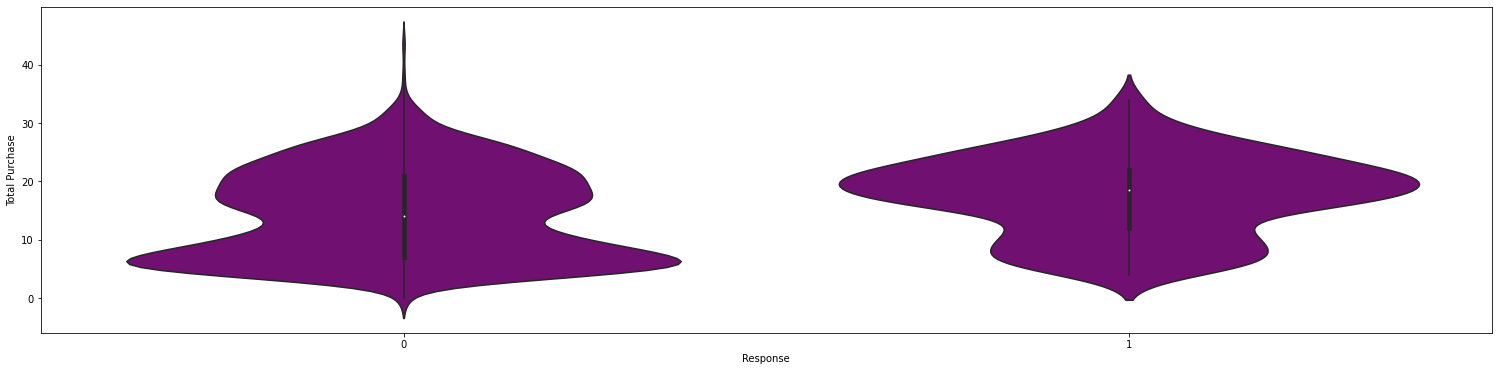

In [28]:
# in the graph below, the total purchase for the response one is more that zero
sns.violinplot(y='Total Purchase',x='Response',data=df,color='purple')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


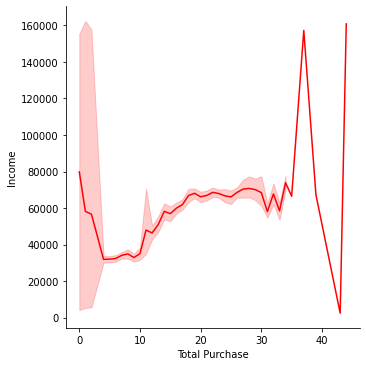

In [29]:
# in the graph, as you see, the highest part is for total purchase more than 40 and Income about 160000$
sns.relplot('Total Purchase','Income',data=df,color='red',kind='line')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


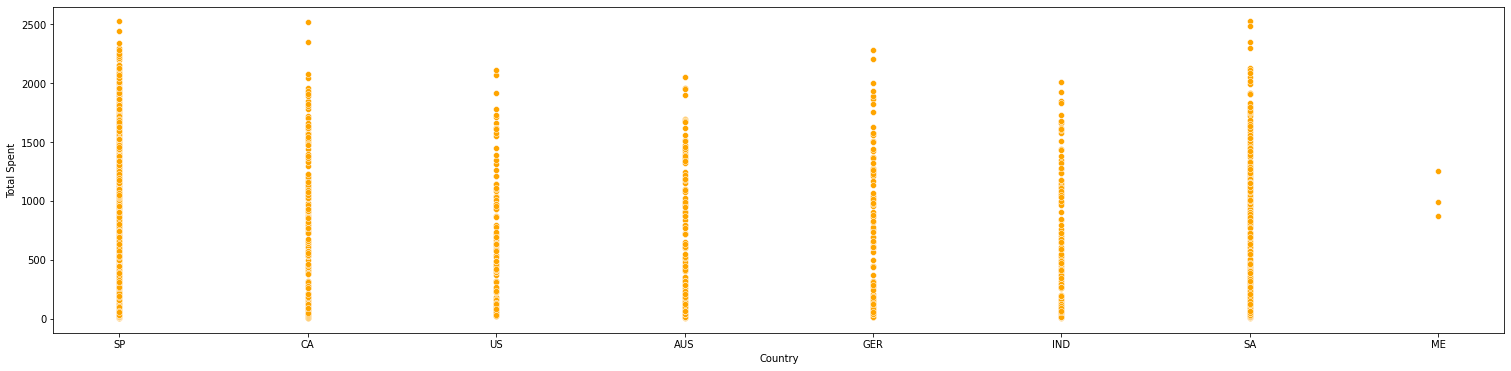

In [30]:
sns.scatterplot('Country','Total Spent',data=df,color='orange')
plt.show()# the highest spent is for spain and singapore and the lowest is for Mexico

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

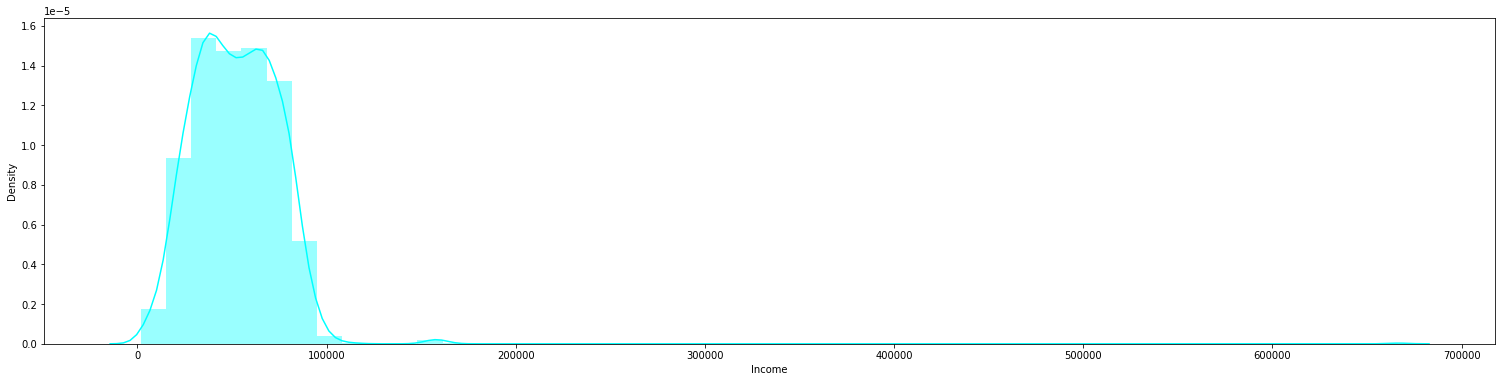

In [31]:
#the range of the income 
sns.distplot(df['Income'], color = 'aqua')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


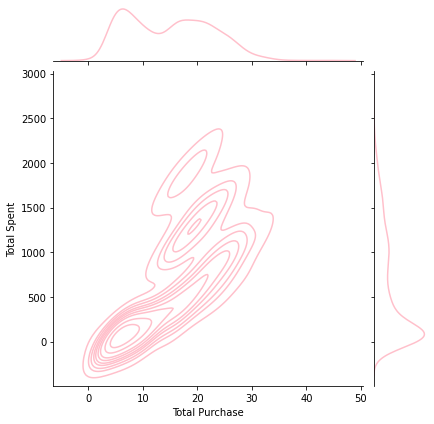

In [32]:
#the total purchase feom zero to 10 and toal spent from zero to 500 has the highest portion
sns.jointplot('Total Purchase','Total Spent',data=df,color='pink',kind='kde')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Total Amount Spent  ')

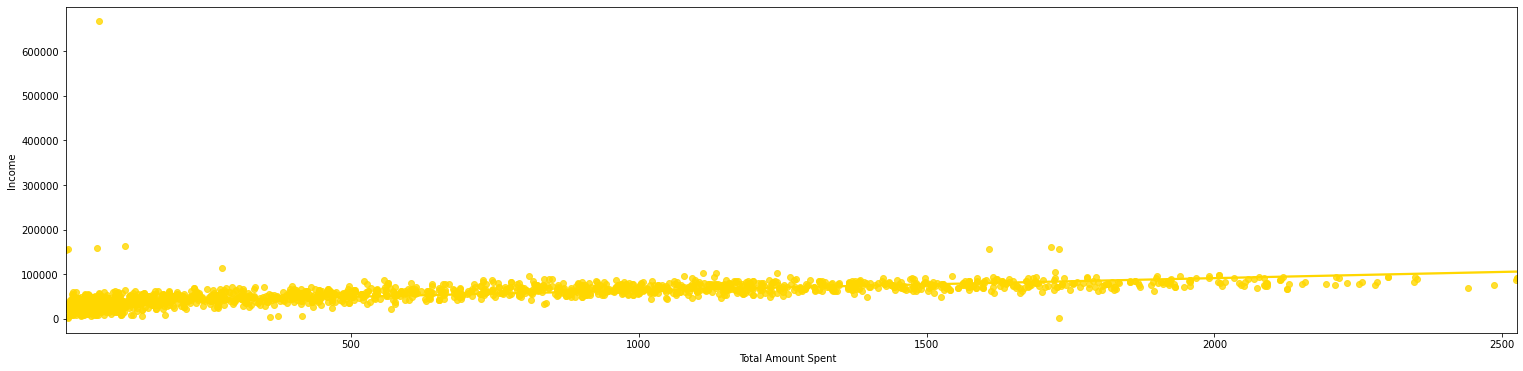

In [33]:
sns.regplot('Total Spent','Income',data=df,color='gold')
plt.xlabel('Total Amount Spent  ')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

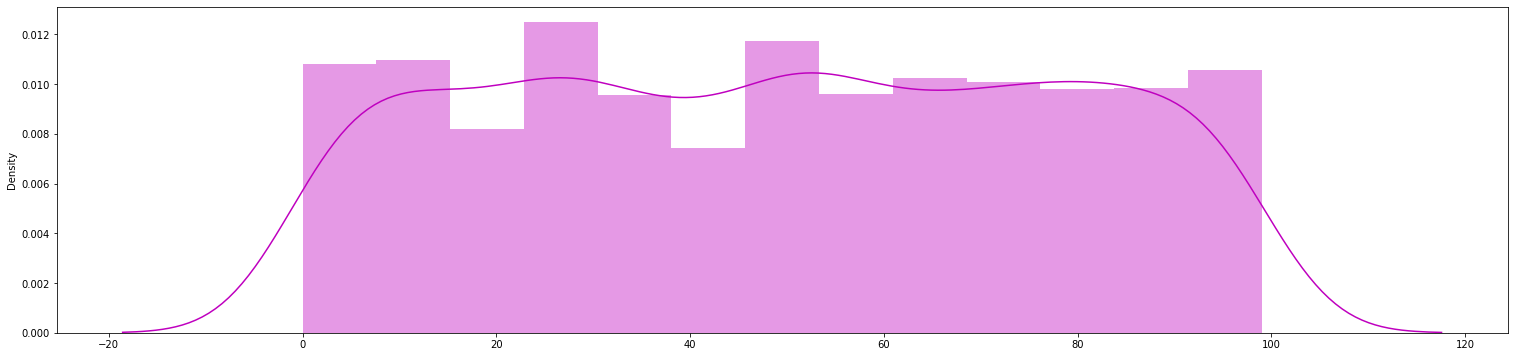

In [34]:
sns.distplot(x=df['Recency'],color='m')

<AxesSubplot:xlabel='Total Purchase', ylabel='Count'>

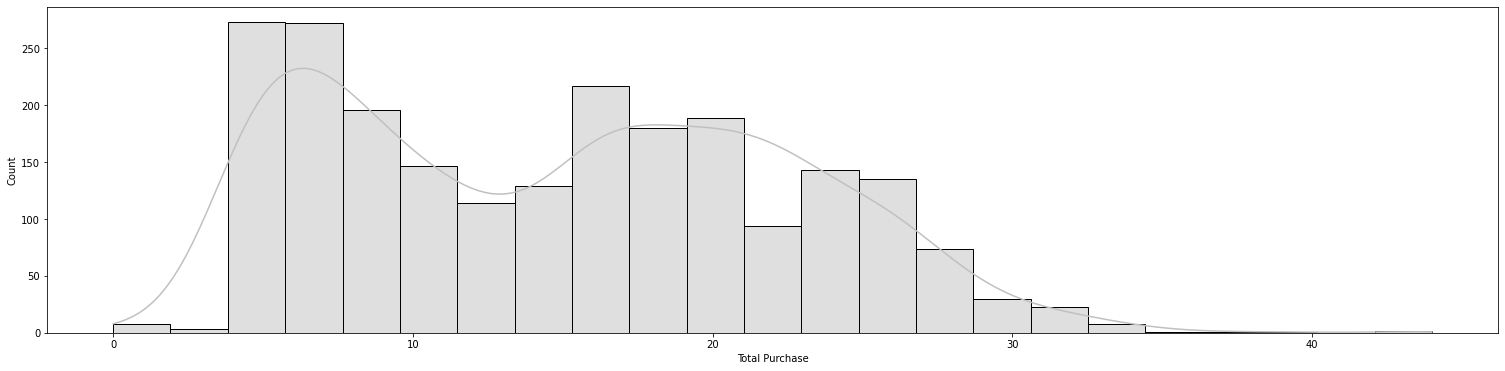

In [35]:
sns.histplot(df['Total Purchase'],kde=True,color='silver')

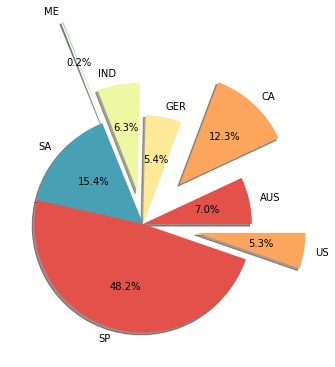

In [36]:
pm = df[['Total Purchase', 'Country']].groupby(['Country']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize=(10,5))
plt.pie(pm['Total Purchase']['sum'], labels = pm.index, explode = (0, 0.5, 0, 0.3, 1, 0, 0, 0.5),  shadow = True, autopct = '%1.1f%%')
plt.show()

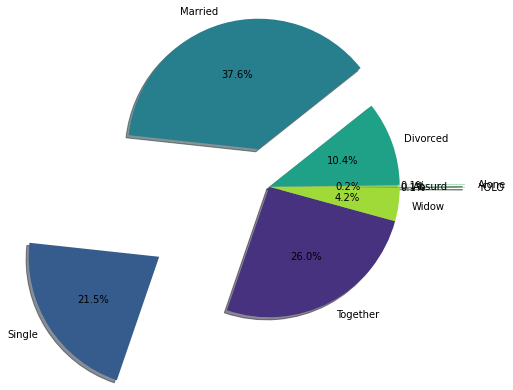

In [37]:
pm=df[['Total Spent', 'Marital_Status']].groupby(['Marital_Status']).agg([sum])

sns.set_palette('viridis_r')
plt.figure(figsize=(10,6))
plt.pie(pm['Total Spent']['sum'], labels=pm.index, explode=(0, 0.5, 0, 0.3, 1, 0, 0, 0.5), shadow=True,autopct='%1.1f%%')
plt.show()

In [38]:
# now we want to use target and non target with some graphs
import plotly.offline as py
py.init_notebook_mode(connected=True)
def plot_pie(column):
    df1= go.Pie(values=target[column].value_counts().values.tolist(),
                    labels  = target[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Target Marketing",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   ) 
    
    df2=go.Pie(values  = non_target[column].value_counts().values.tolist(),
                    labels  = non_target[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non Target Marketing" 
                   )
    
    
    layout= go.Layout(dict(title = column + " distribution in marketing attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Target Marketing",
                                                font = dict(size = 14),
                                                showarrow = False,
                                                x = .20, y = .5),
                                           dict(text = "Non Target Marketing",
                                                font = dict(size = 14),
                                                showarrow = False,
                                                x = .83,y = .4
                                               )
                                          ]
                           )
                      )
    
    df = [df1,df2]
    fig  = go.Figure(data = df,layout = layout)
    py.iplot(fig)

In [39]:
plot_pie(cat_cols[0])

* As you see, for target marketing the highest portion is for Graduatio and for non target(zero) the highest one is also for Graduation.

In [40]:
plot_pie(cat_cols[8])

# we want to use histogarm for analyzing the continuous variables¶

In [41]:
def histogram(column):
    df1=go.Histogram(x=target[column],
                     name='Target Marketting',
                     histnorm="percent",
                     marker=dict(line=dict(width=.3,
                                           color='black'
                                          
                                        )
                                ),
                     
                    opacity=.8
                    )
    
    
    df2=go.Histogram(x=non_target[column],
                    name='Non Target Marketting',
                    histnorm='percent',
                    marker=dict(line=dict(width=.3,color='black'
                                          
                                          )
                                ),
                     opacity=.8
                    )
    
    data=[df1,df2]
    
    layout=go.Layout(dict(title=column+"Distribution in costumer attrition",
                          plot_bgcolor="rgb(243,243,243)",
                          paper_bgcolor="rgb(243,243,243)",
                          xaxis=dict(gridcolor="rgb(255,255,255)",
                                     title=column,
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2
                                    ),
                          yaxis=dict(gridcolor="rgb(255,255,255)",
                                     title="percent",
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2
                                    
                                    ),
                         )
                    )
    fig=go.Figure(data=data,layout=layout)
    py.iplot(fig)
 

In [42]:
#it shows that the costumers with the age 46 has the highest percet and churn.
histogram(num_col[1])

* for this part, the highest portion for taregt marketting for salary is 80_85k

In [43]:
histogram(num_col[3])

* As you see, the highest portion for recency is 0-4 and include 11% for target marketting and for non target is 45-49

# we want to make a model with different algorithms and first we have to prepare the data

In [44]:
list=['Education','Marital_Status','Country']
df=pd.get_dummies(df,columns=list,prefix=list)

In [45]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,84835.0,0,0,0,189,104,379,111,189,218,...,0,0,0,0,0,0,0,0,1,0
1,57091.0,0,0,0,464,5,64,7,0,37,...,0,0,0,1,0,0,0,0,0,0
2,67267.0,0,1,0,134,11,59,15,2,30,...,0,0,0,0,0,0,0,0,0,1
3,32474.0,1,1,0,10,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,21474.0,1,0,0,6,16,24,11,0,34,...,0,0,0,0,0,0,0,0,1,0


In [46]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
y = df["Response"]
x = df.drop(["Response","Income","Total Spent","Total Purchase","Recency","Complain","Teenhome"], axis = 1)

In [48]:
#Train and Test the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=12345)

In [49]:
from imblearn.combine import SMOTETomek
#we make the model
model=SMOTETomek()
model.fit(x_train,y_train)
#test the data
model.fit(x_test,y_test)

SMOTETomek()

In [50]:
print(x_train.shape,y_train.shape,x_test.shape,y_train.shape)

(1568, 38) (1568,) (672, 38) (1568,)


In [51]:
models=[]
models.append(('LR',LogisticRegression(random_state=12345)))
models.append(('DT',DecisionTreeClassifier(random_state=12345)))
models.append(('GB',GradientBoostingClassifier(random_state=12345)))
models.append(('NN',MLPClassifier(random_state=(12345))))
models.append(('SVM',SVC(random_state=(12345))))
models.append(('RF',RandomForestClassifier(random_state=(12345))))
models.append(('KN', KNeighborsClassifier()))
#valute
result=[]
name=[]

In [52]:
#we compare the models with each other
for name , model in models:
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    accuracy=accuracy_score(y_test,predictions)
    msg = "%s: (%f)" % (name, accuracy)
    print(msg)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LR: (0.840774)
DT: (0.794643)
GB: (0.846726)
NN: (0.854167)
SVM: (0.831845)
RF: (0.846726)
KN: (0.833333)


# Result
* As you see, we use different visualization part with different attributes and also we divided the dta to num columns and cat columns with target and non target marketting and at the end of the part, we train and test the model with 7 different algorithms and we can see the percentage which one has the best one .